# Visualización de datos con estilo con Seaborn de Python

## 1.Primeros pasos

In [1]:
# Importamos librerias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Cargamos y visualizamos el dataset
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


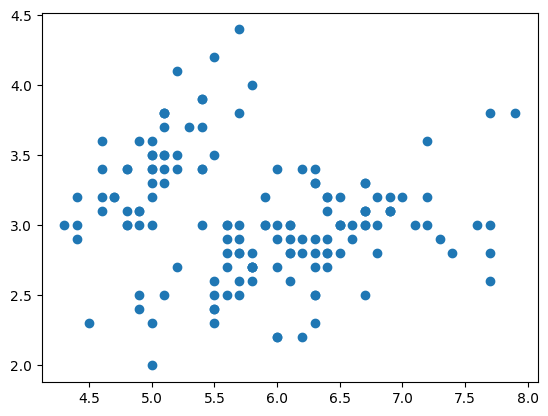

In [2]:
# Ploteamos un gráfico de dispersión
plt.scatter(iris.sepal_length, iris.sepal_width)
plt.show()

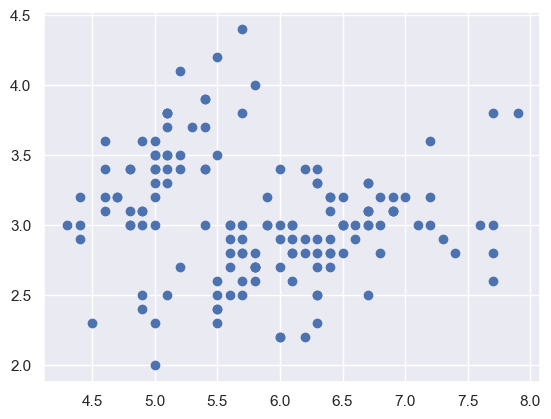

In [3]:
sns.set() # Alias para activar el tema para el conjunto de datos
plt.scatter(iris.sepal_length, iris.sepal_width)
plt.show()

## 2.Estilo y contexto

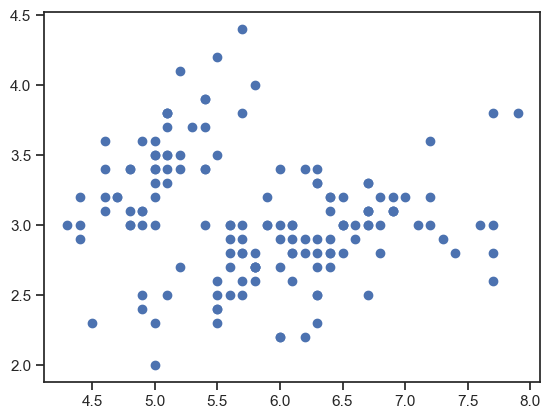

In [4]:
# Estilos: darkgrid, whitegrid, dark, white, ticks
sns.set_style('ticks')
plt.scatter(iris.sepal_length, iris.sepal_width)
plt.show()

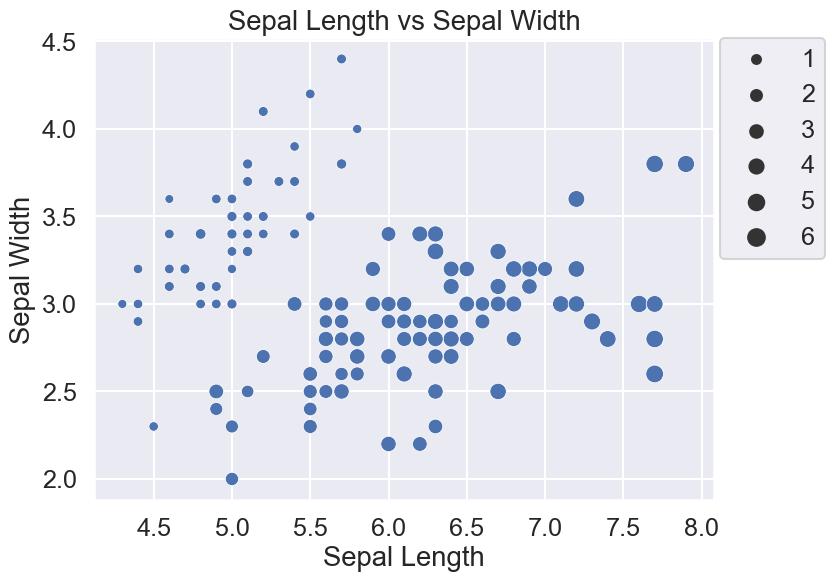

In [5]:
# Gráfico de disperción con leyenda y el tamaño de los puntos se cambiará según la longitud del pétalo
sns.set_style('darkgrid')
sns.set_context('talk', # paper, notebook, talk, poster
                font_scale=1.1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x = iris.sepal_length,
                y = iris.sepal_width, 
                size="petal_length",
                data=iris
               )
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.legend(bbox_to_anchor = (1.01, 1),
           borderaxespad=0)
plt.show()

**Documentación:**
- [seaborn.set_context](https://seaborn.pydata.org/generated/seaborn.set_context.html)
- [matplotlib.pyplot.legend](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.legend.html)

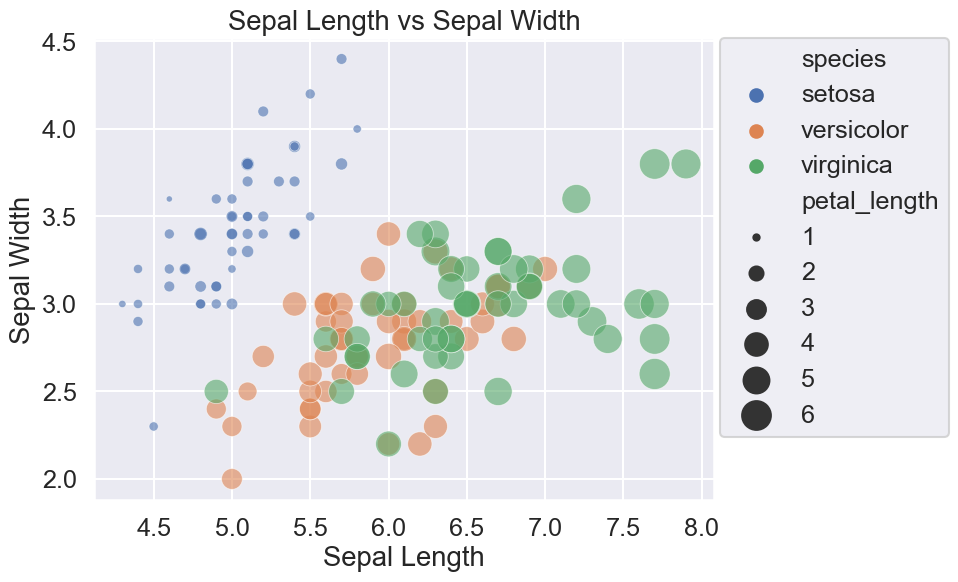

In [6]:
# Gráfico de dispersión con 3 variables
sns.set_context('talk',
                font_scale=1.1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x = iris.sepal_length,
                y = iris.sepal_width, 
                size="petal_length",
                data=iris,
                sizes=(20, 500),
                hue="species", 
                alpha=0.6,
                palette="deep")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.legend(bbox_to_anchor = (1.01, 1),
           borderaxespad=0)
plt.show()

**Documentación:**
- [seaborn.color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html)
- [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

## 3.`relplot()`

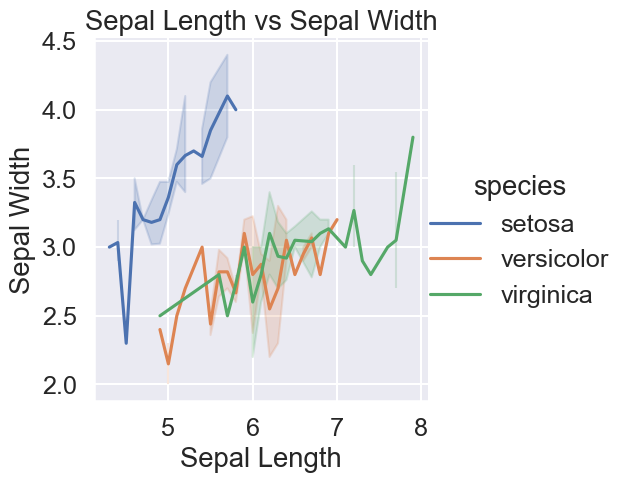

In [7]:
# Gráfico de líneas con intervalo de confianza
sns.relplot(x = iris.sepal_length,
            y = iris.sepal_width,
            data=iris,
            kind='line',
            hue='species'
            )
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.show()

**Documentación:** [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html)

## 4.`displot()`

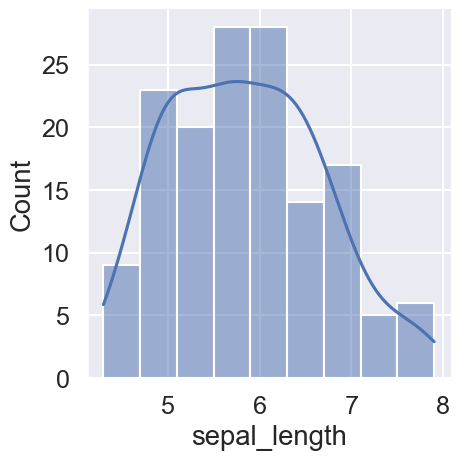

In [8]:
# El distplot nos puede ofrecer un histograma con la distribución de una variable continua
sns.displot(data=iris,
            x=iris.sepal_length,
            kde=True)
plt.show()

**Documentación:** [seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

### `tips` dataset

El conjunto de datos de propinas es un marco de datos con 244 filas y 7 variables que representa algunos datos de propinas en los que un camarero registró información sobre cada propina que recibió durante un periodo de unos meses trabajando en un restaurante. En total, el camarero registró 244 propinas. Los datos se recogieron en una colección de estudios de casos para estadísticas empresariales (Bryant & Smith, 1995). El camarero recogió varias variables: La propina en dólares, la cuenta en dólares, el sexo del pagador de la cuenta, si había fumadores en el grupo, el día de la semana, la hora del día y el tamaño del grupo.

In [9]:
# Cargamos el dataset 'tips'
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


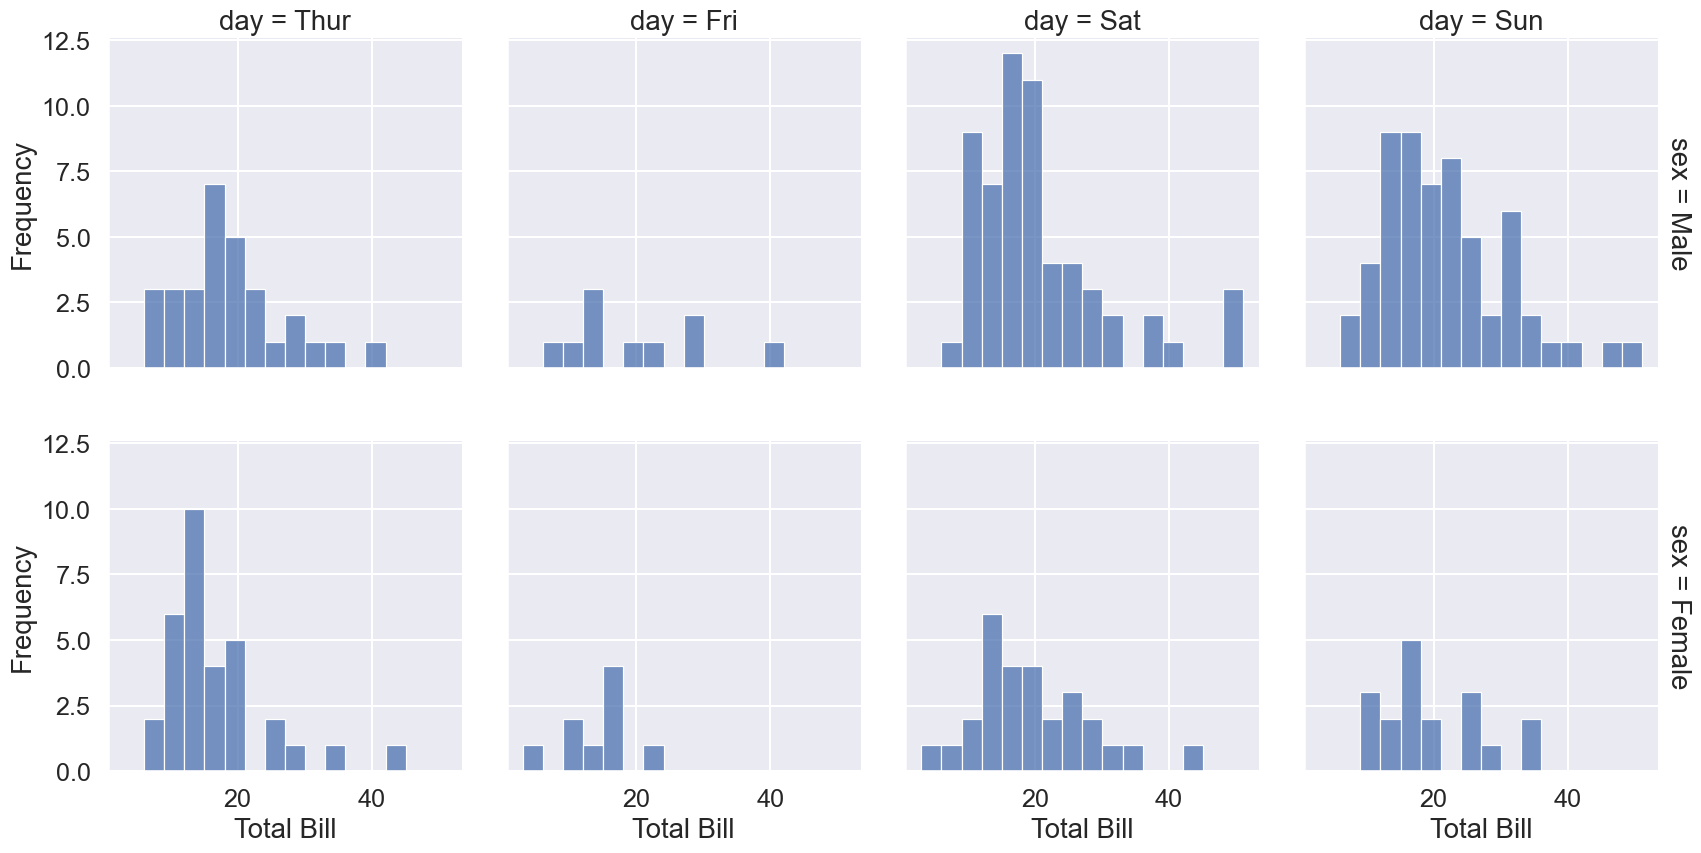

In [10]:
# Histogramas de una variable continua segregadas por una variable categórica
g = sns.displot(tips,
                x="total_bill",
                col="day",
                row="sex",
                binwidth=3,
                height=3,
                facet_kws=dict(margin_titles=True))
g.fig.set_size_inches(18, 10)
g.set_axis_labels("Total Bill", "Frequency")
plt.show()

**Documentación:** [seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html)

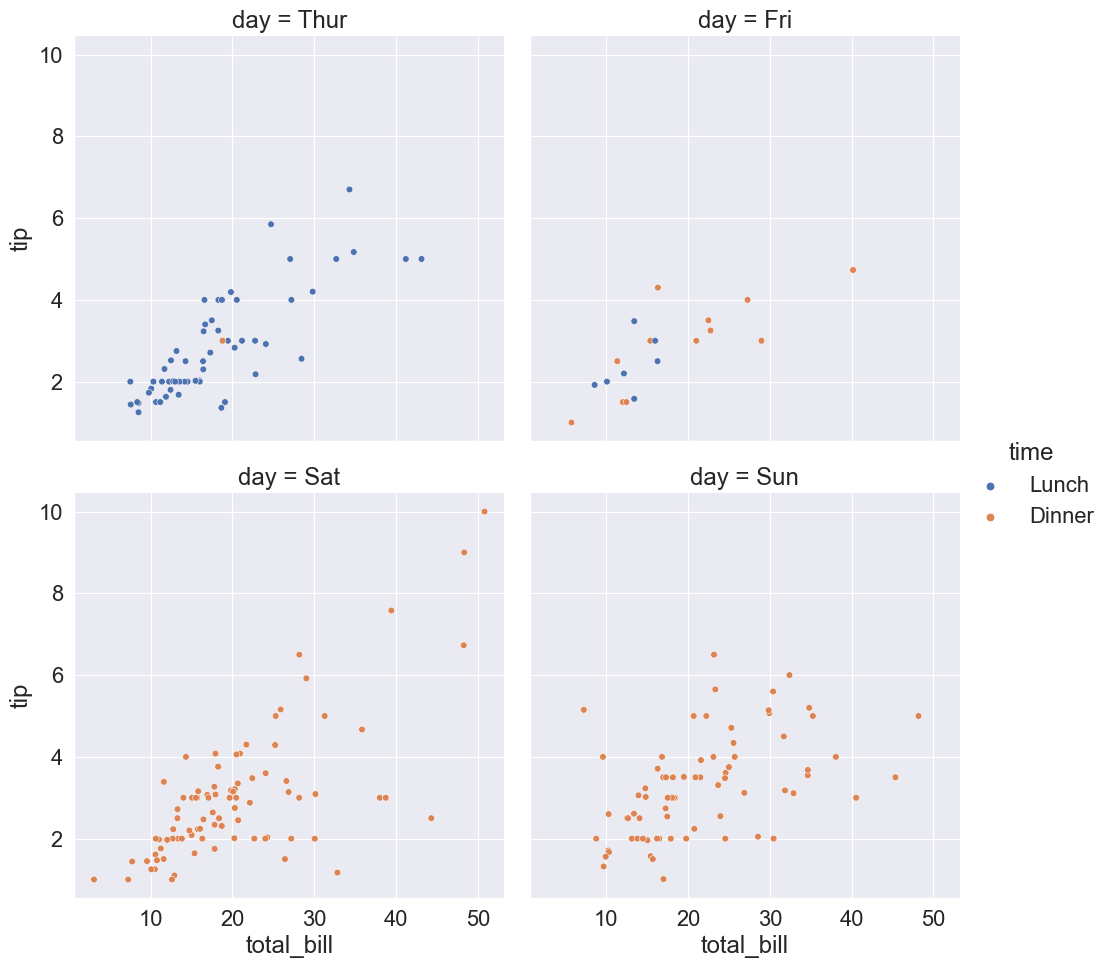

In [11]:
# Gráficos de dispersión de la factura total frente a la propina segregados por el día y la hora con relplot
sns.set_context('paper', font_scale=1.8)
sns.relplot(x = 'total_bill',
            y= 'tip',
            data=tips,
            hue="time",
            col='day',
            col_wrap=2)
plt.show()

## 5.`barplot()`

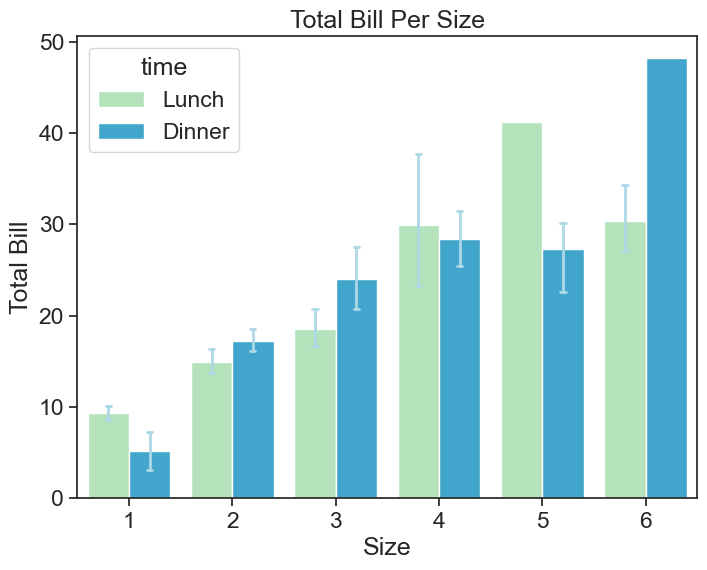

In [37]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='size',
            y= 'total_bill',
            hue='time',
            palette = 'GnBu',
            data=tips,
            capsize=0.05,
            saturation=5,
            errcolor='lightblue',
            errwidth=2)
plt.xlabel("Size")
plt.ylabel("Total Bill")
plt.title("Total Bill Per Size")
plt.show()

**Documentación:** [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

## 6.`countplot()`

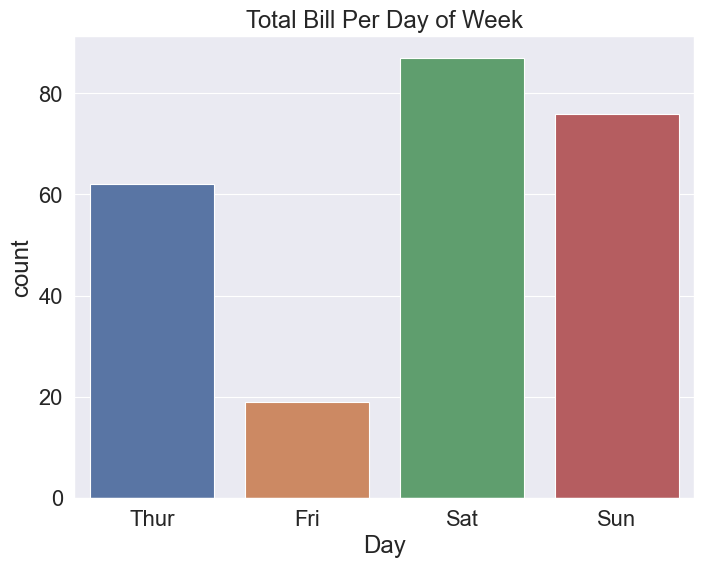

In [13]:
# Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='day',
              data=tips)
plt.xlabel("Day")
plt.title("Total Bill Per Day of Week")
plt.show()

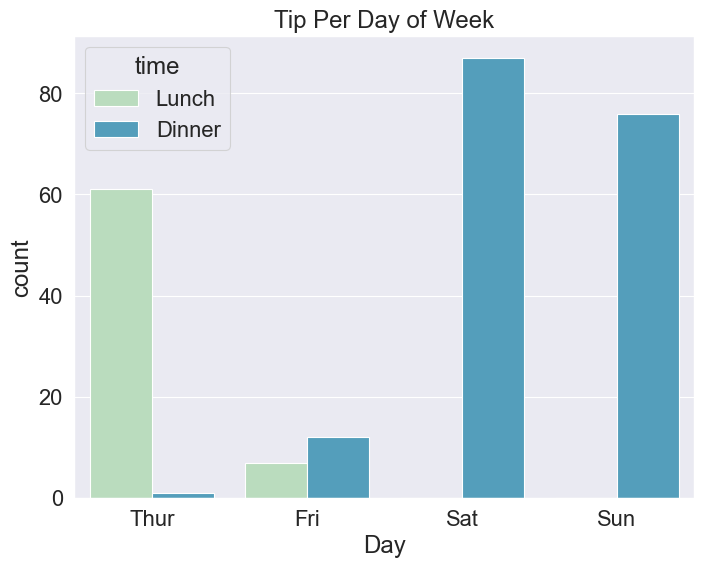

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'day',
              hue='time',
              palette = 'GnBu',
              data=tips)
plt.xlabel("Day")
plt.title("Tip Per Day of Week")
plt.show()

**Documentación:** [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

## 7.`swarmplot()`

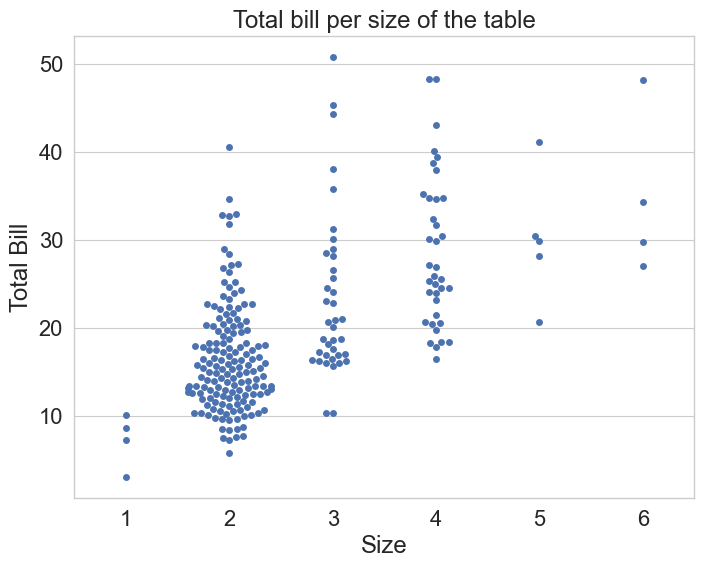

In [15]:
# El swarmplot se asegura que los datos no se superponen
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.swarmplot(x='size',
              y='total_bill',
              data=tips)
plt.xlabel("Size")
plt.ylabel("Total Bill")
plt.title("Total bill per size of the table")
plt.show()

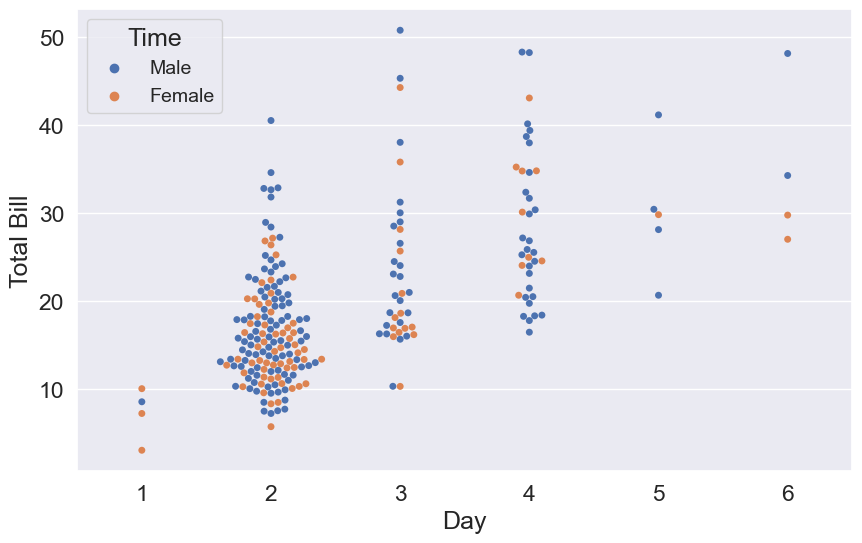

In [16]:
# Añadimos 'hue' para mostrar diferentes colores según el género
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
sns.swarmplot(x='size',
              y='total_bill',
              data=tips,
              hue="sex")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.legend(title="Time", fontsize=14)
plt.show()

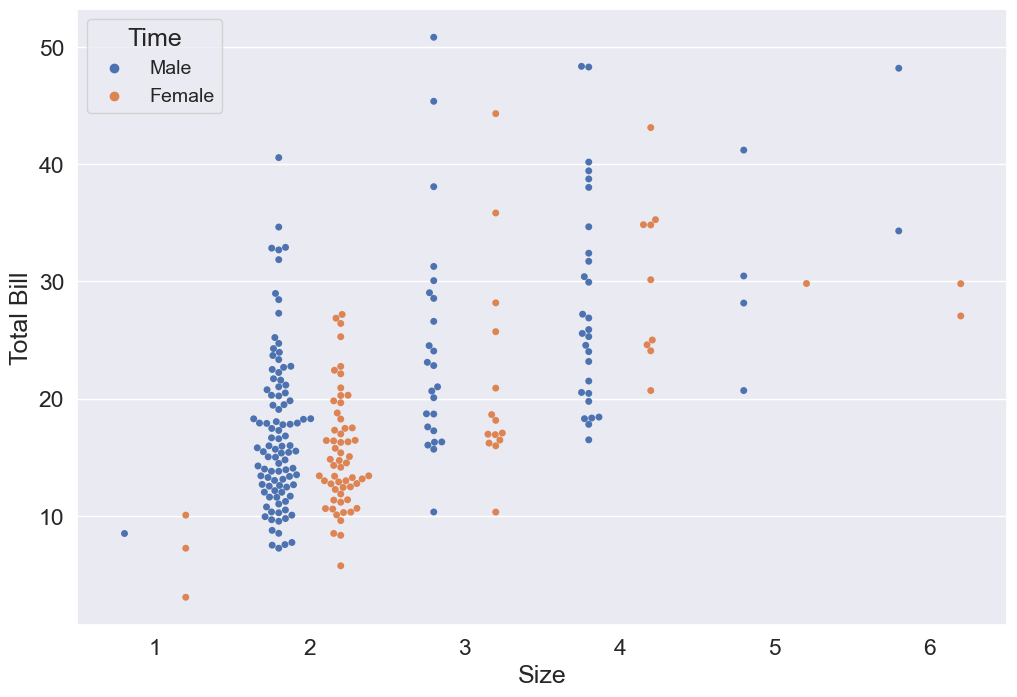

In [39]:
# Separaramos la segregación de género con dodge='True'
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
sns.swarmplot(x='size',
              y='total_bill',
              data=tips,
              hue="sex",
              dodge=True)
plt.xlabel("Size")
plt.ylabel("Total Bill")
plt.legend(title="Time", fontsize=14)
plt.show()

**Documentación:** [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

## 8.`catplot()`

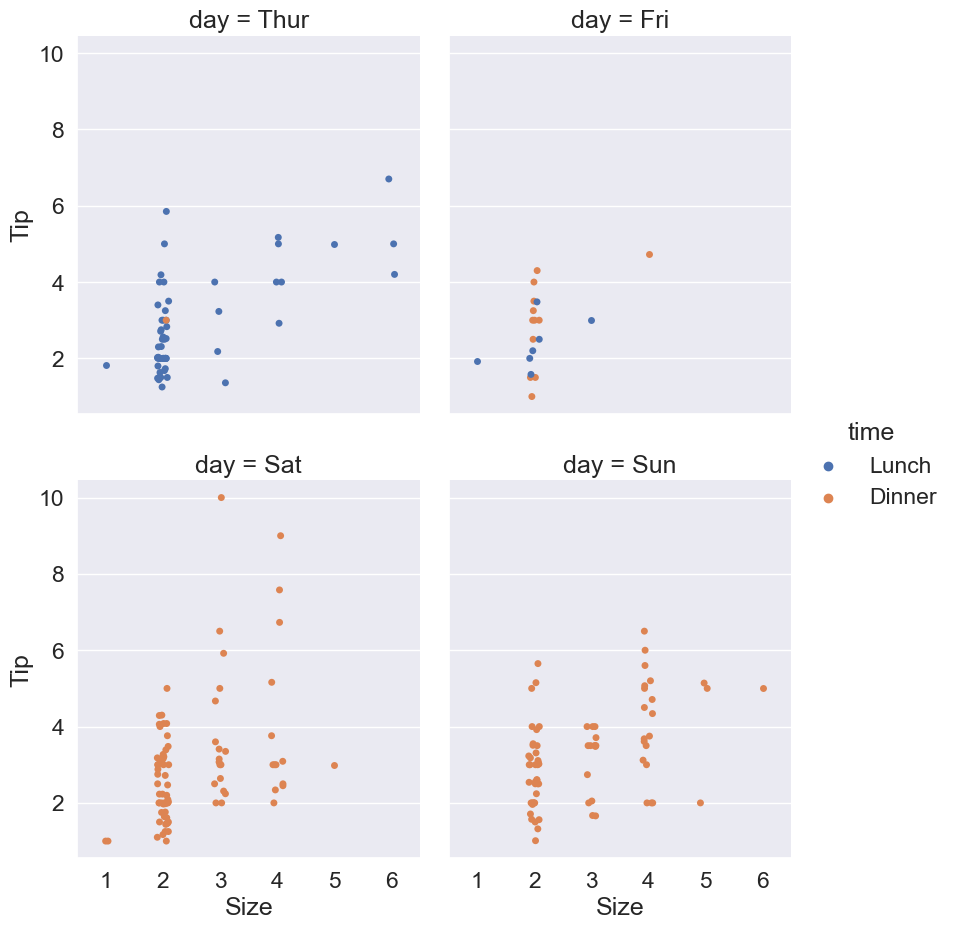

In [41]:
# Figura con múltiples variables categoricas
g = sns.catplot(x='size',
                y="tip",
                data=tips,
                hue="time",
                col="day",
                kind="strip",
                col_wrap=2,
                height=4)
g.fig.set_size_inches(10, 10)
g.set_axis_labels("Size", "Tip")
plt.show()

**Documentación:** [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

## 9.`pointplot()`

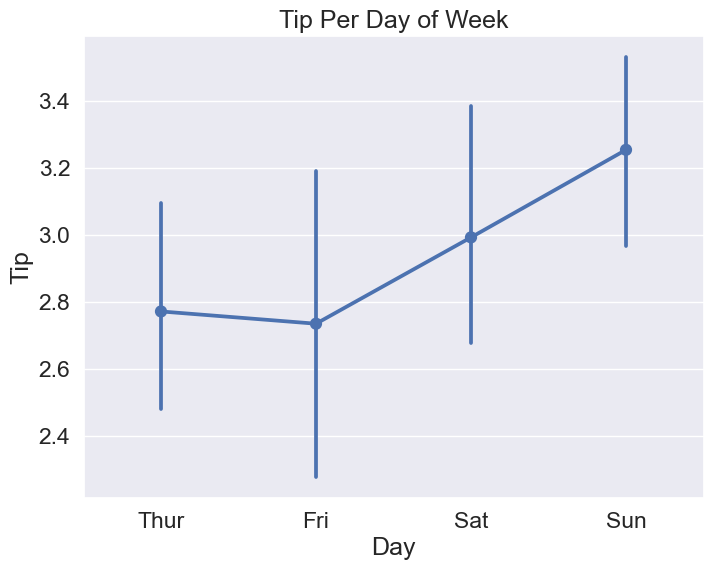

In [19]:
# Los puntos muestran la media y las líneas verticales representan el intervalo de confianza
plt.figure(figsize=(8, 6))
sns.pointplot(x="day",
              y="tip",
              data=tips)
plt.xlabel("Day")
plt.ylabel("Tip")
plt.title("Tip Per Day of Week")
plt.show()

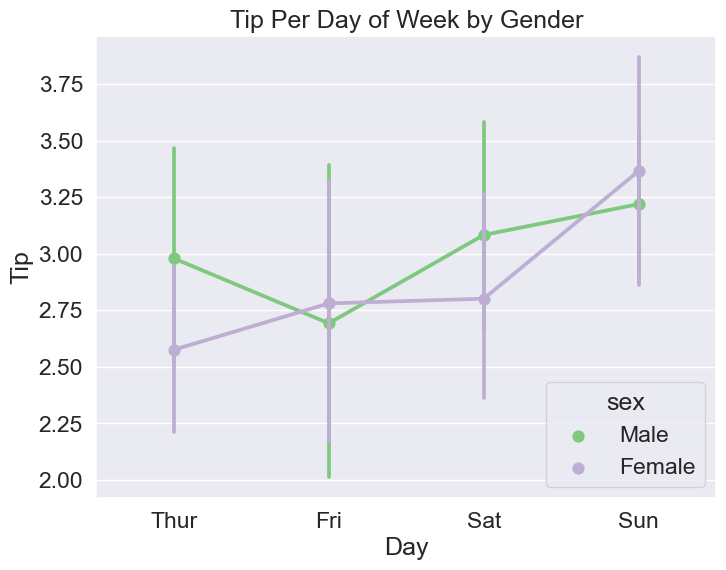

In [43]:
# Añadimos otra categoría con 'hue'
plt.figure(figsize=(8, 6))
sns.pointplot(x="day",
              y="tip",
              hue="sex",
              data=tips,
              palette="Accent")
plt.xlabel("Day")
plt.ylabel("Tip")
plt.title("Tip Per Day of Week by Gender")
plt.show()

**Documentación:** [seaborn.pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html)

## 10.`regplot()`

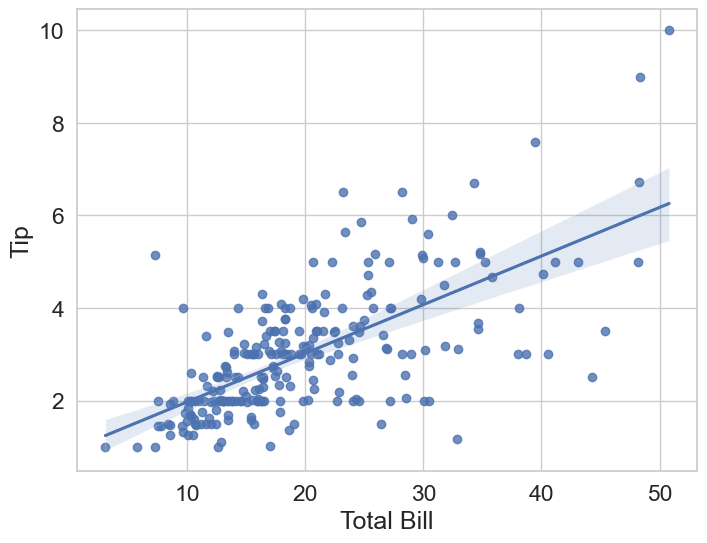

In [21]:
# gráfico de dispersión que añade una línea de regresión lineal y una banda de confianza
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.regplot(x='total_bill',
            y='tip',
            data=tips)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

**Documentación:** [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)

## 11.`jointplot()`

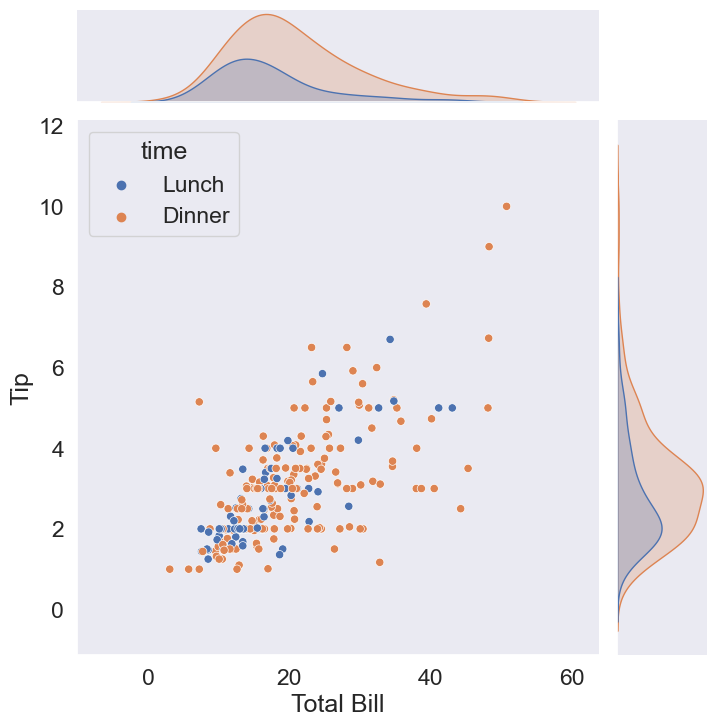

In [22]:
# Gráfico conjunto
sns.set_style('dark')
g = sns.jointplot(x='total_bill',
                  y='tip',
                  hue='time',
                  data=tips)
g.fig.set_size_inches(8, 8)
g.set_axis_labels("Total Bill", "Tip")
plt.show()

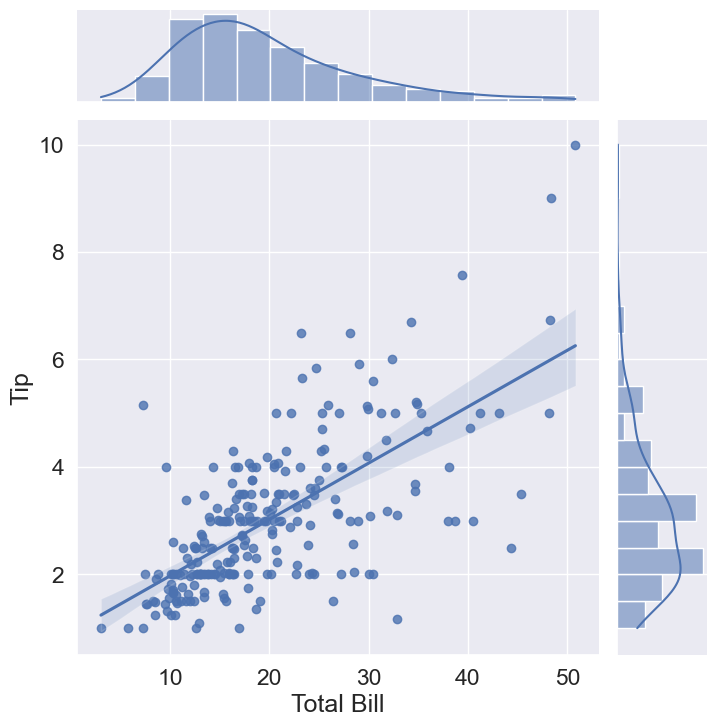

In [23]:
# Jointplot del tipo Regresión
sns.set_style('darkgrid')
g = sns.jointplot(x='total_bill',
                  y='tip',
                  data=tips,
                  kind='reg')
g.fig.set_size_inches(8, 8)
g.set_axis_labels("Total Bill", "Tip")
plt.show()

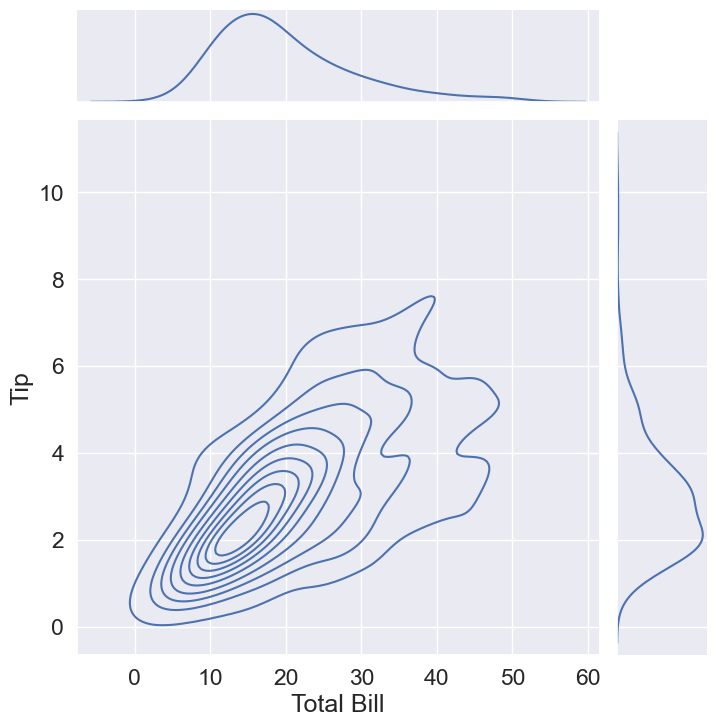

In [24]:
# Jointplot del tipo KDE
sns.set_style('darkgrid')
g = sns.jointplot(x='total_bill',
                  y='tip',
                  data=tips,
                  kind='kde')
g.fig.set_size_inches(8, 8)
g.set_axis_labels("Total Bill", "Tip")
plt.show()

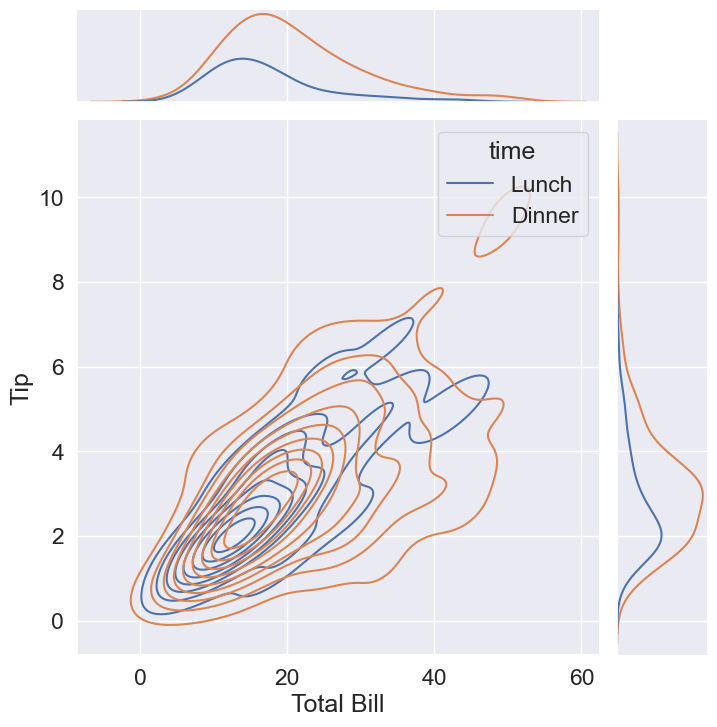

In [25]:
# Jointplot del tipo KDE con hue
sns.set_style('darkgrid')
g = sns.jointplot(x='total_bill',
                  y='tip',
                  hue='time',
                  data=tips,
                  kind='kde')
g.fig.set_size_inches(8, 8)
g.set_axis_labels("Total Bill", "Tip")
plt.show()

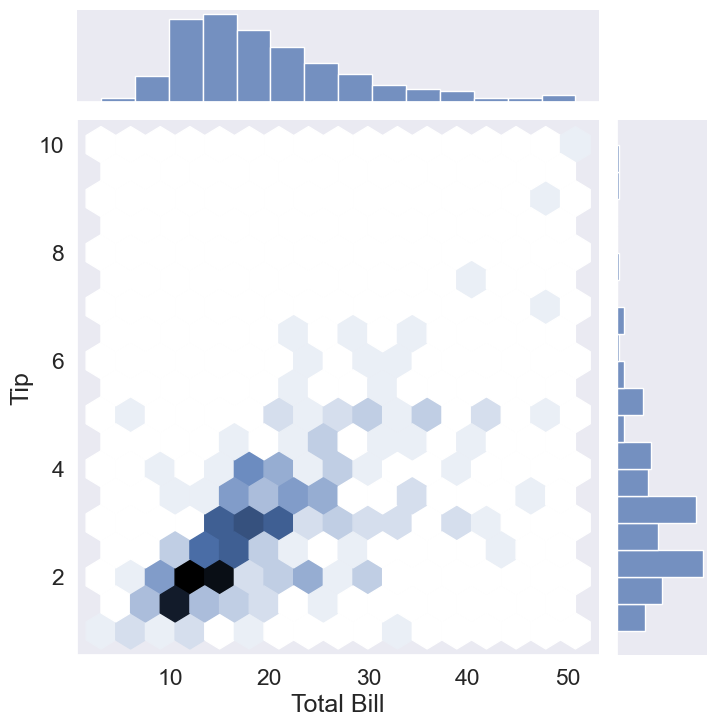

In [26]:
# Un hexplot en un jointplot
sns.set_style('dark')
g = sns.jointplot(x='total_bill',
                  y='tip',
                  data=tips,
                  kind='hex')
g.fig.set_size_inches(8, 8)
g.set_axis_labels("Total Bill", "Tip")
plt.show()

**Documentación:** [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

## 12.`kdeplot()`

/var/folders/j3/cj2m33117h1g9l38ly6r6vgw0000gn/T/ipykernel_50750/1188377097.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(x='total_bill',


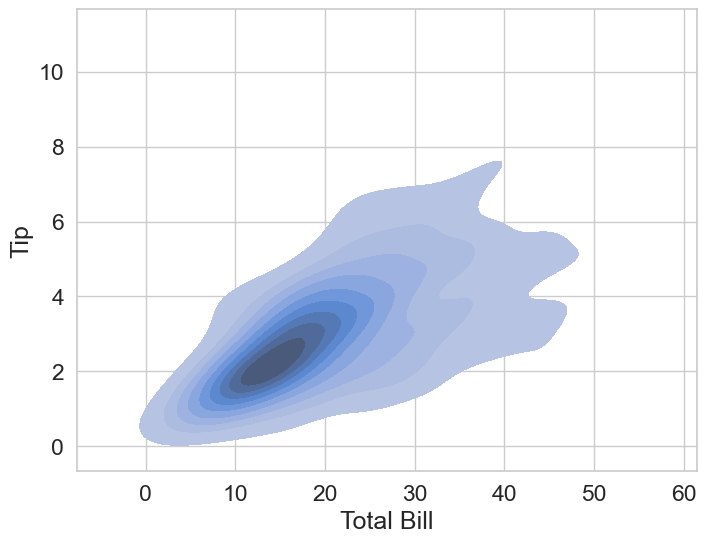

In [27]:
# Gráfico KDE con sombra
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
g = sns.kdeplot(x='total_bill',
                y='tip',
                shade=True,
                data=tips)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

**Documentación:** [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

## 13.`lmplot()`

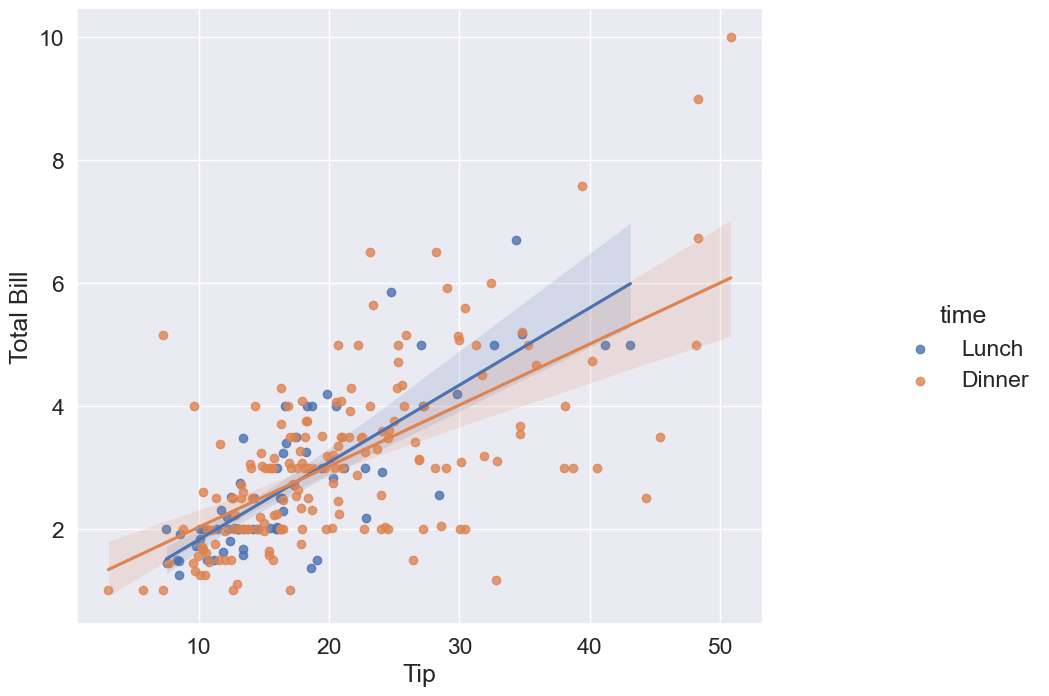

In [28]:
# Plotea un modelos de regresión a través de subconjuntos condicionales de un conjunto de datos
sns.set(font_scale=1.5)
sns.lmplot(x='total_bill',
           y='tip',
           data = tips, 
           hue='time')
plt.gcf().set_size_inches(12, 8)
plt.ylabel("Total Bill")
plt.xlabel("Tip")
plt.show()

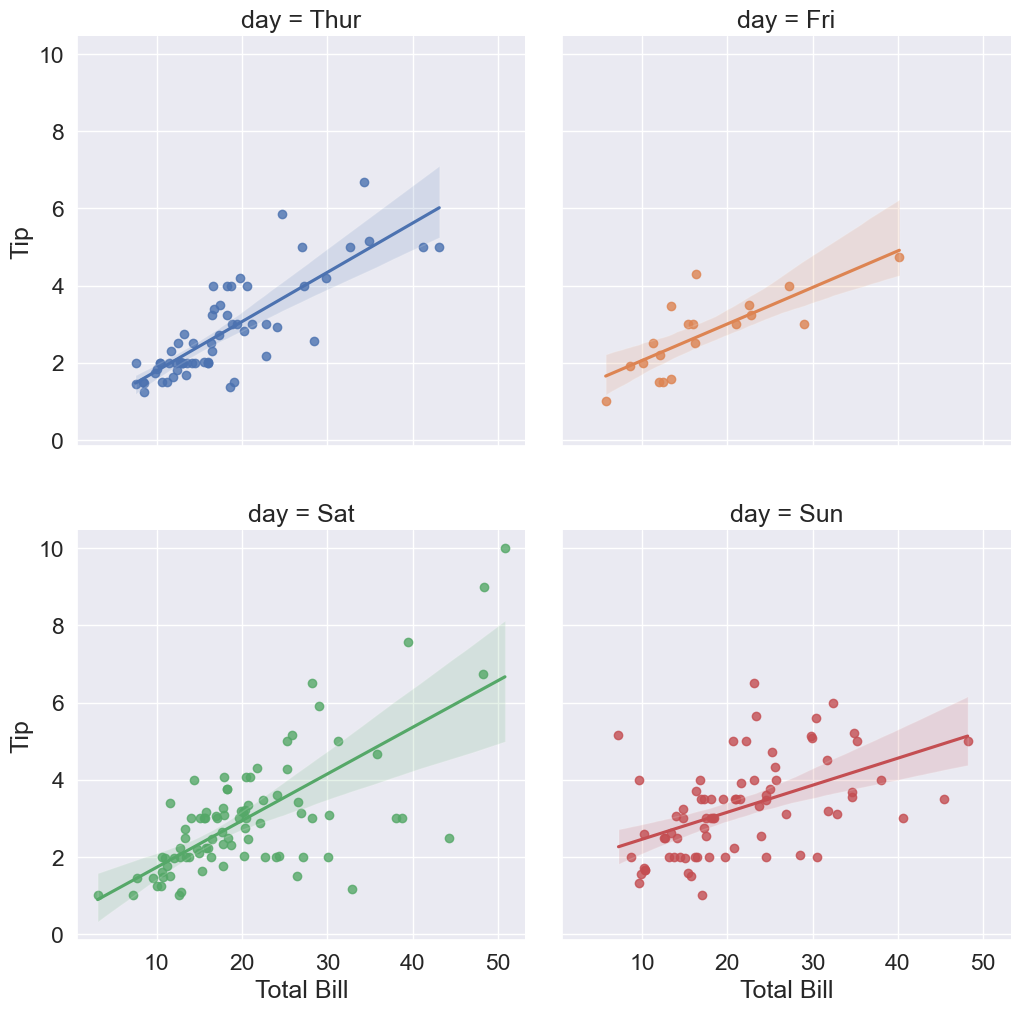

In [29]:
# lmplot con la factura total frente a la propina por día
g = sns.lmplot(x='total_bill',
               y='tip',
               col="day",
               hue = "day",
               data=tips,
               col_wrap=2,
               height=4)
g.fig.set_size_inches(11, 11)
g.set_axis_labels("Total Bill", "Tip")
plt.show()

**Documentación:** [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

## 14.`boxplot()`

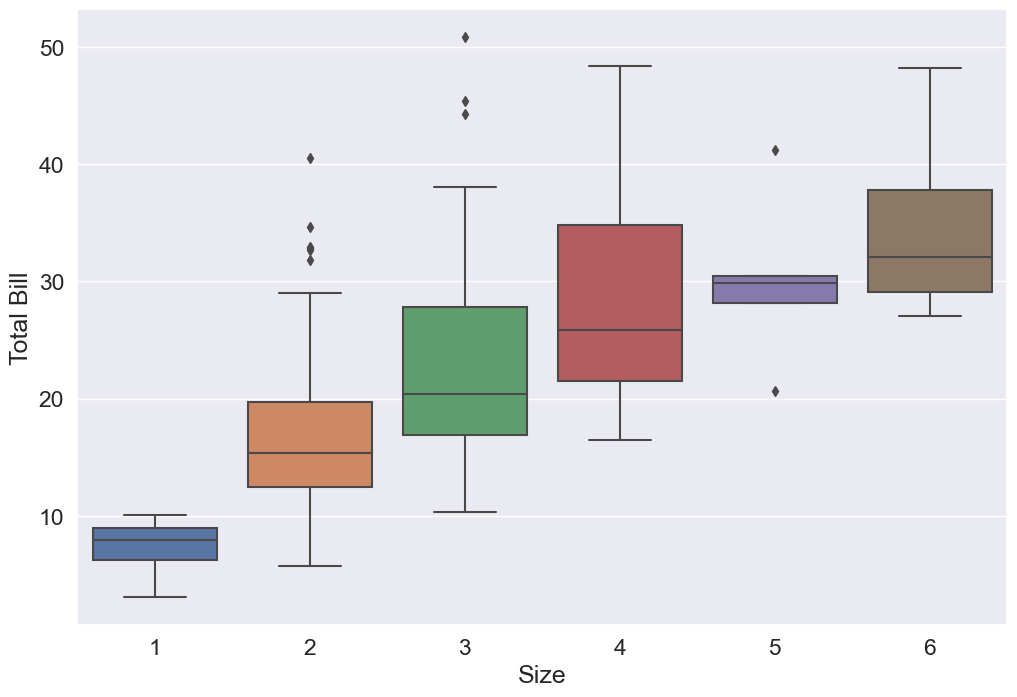

In [30]:
# Boxplots de la factura total por tamaño
sns.set(font_scale = 1.5)
sns.boxplot(x='size',
            y='total_bill',
            data=tips)
plt.gcf().set_size_inches(12, 8)
plt.xlabel("Size")
plt.ylabel("Total Bill")
plt.show()

**Documentación:** [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

## 15.`violinplot()`

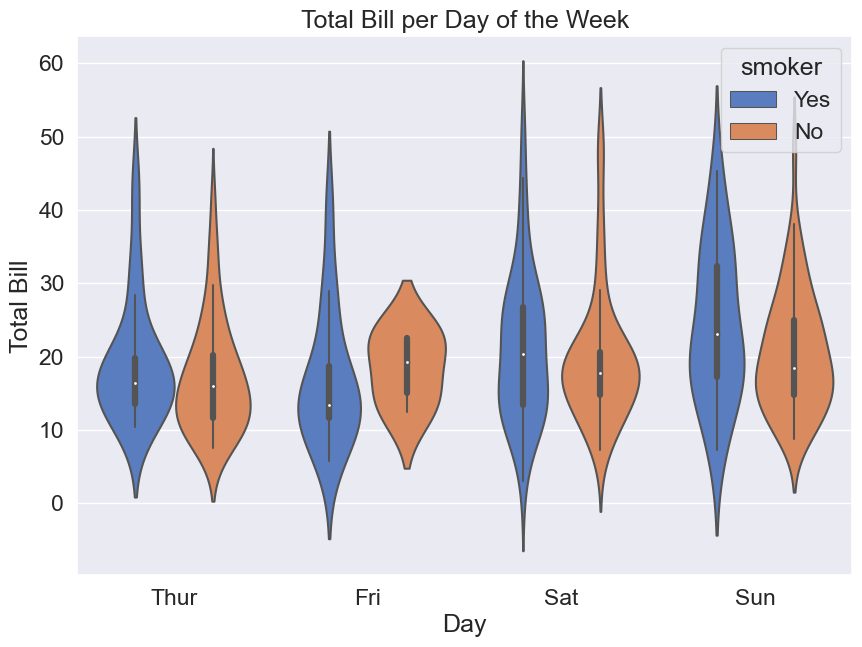

In [31]:
# La distribución de la factura total de cada día por el fumador y el no fumador
plt.figure(figsize=(10, 7))
sns.violinplot(x='day',
               y='total_bill',
               hue="smoker",
               data=tips,
               palette="muted")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total Bill per Day of the Week")
plt.show()

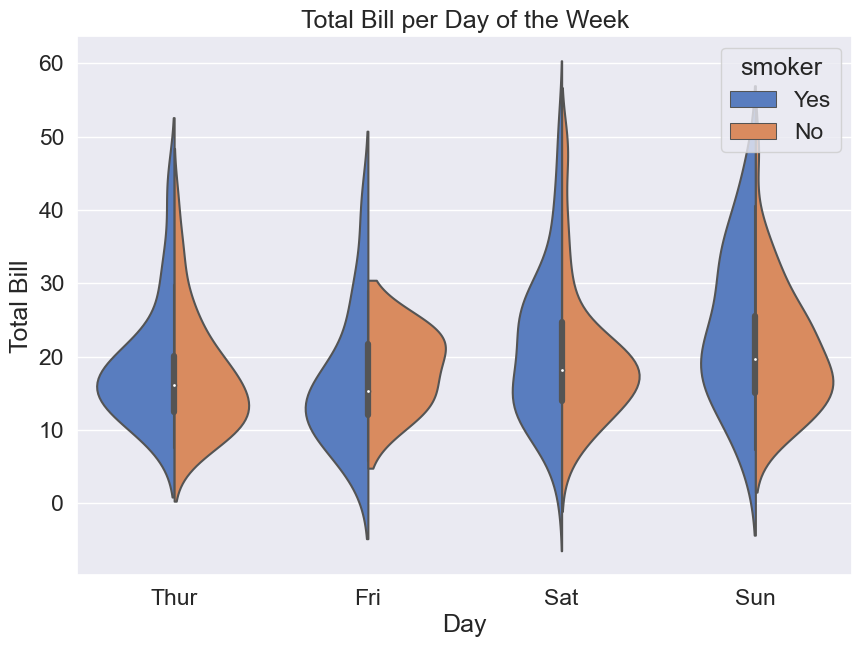

In [32]:
# Un violin con dos categorías
plt.figure(figsize=(10, 7))
sns.violinplot(x='day',
               y='total_bill',
               hue="smoker",
               data=tips,
               palette="muted",
               split=True)
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total Bill per Day of the Week")
plt.show()

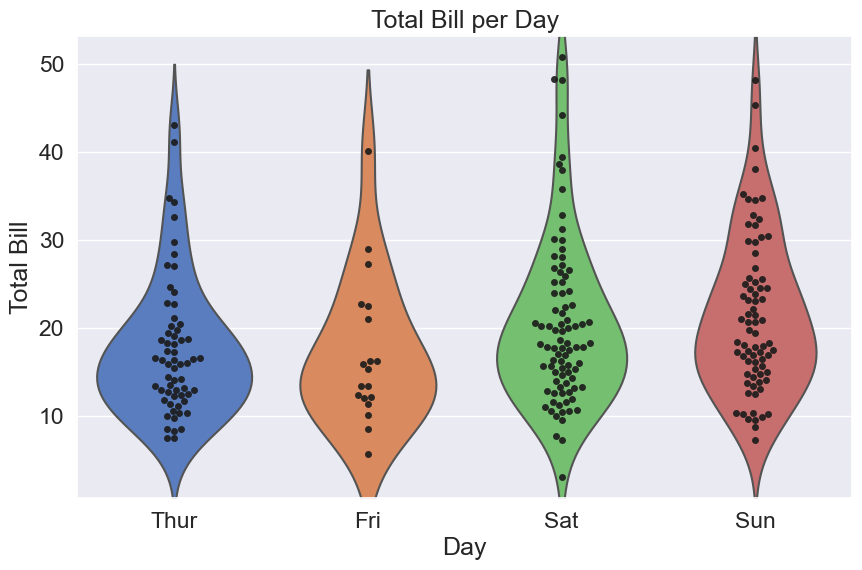

In [33]:
# Figura de violin con enjambre (swarmplot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='day',
               y='total_bill',
               inner=None,
               data=tips,
               palette="muted")
sns.swarmplot(x='day',
              y='total_bill',
              data=tips,
              color="k",
              alpha=0.9)
plt.ylabel("Total Bill")
plt.xlabel("Day")
plt.title("Total Bill per Day")
plt.show()

**Documentación:** [seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

## 16.`heatmap()`

In [49]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


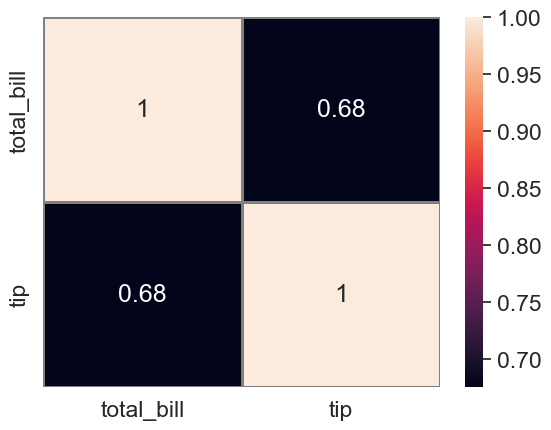

In [51]:
# Correlación entre la factura total y el importe de la propina
sns.heatmap(tips[["total_bill",
                  "tip"]].corr(),
            annot=True, 
            linewidths=0.9,
            linecolor="gray")
plt.show()

**Documentación:** [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## 17.`pairplot()`

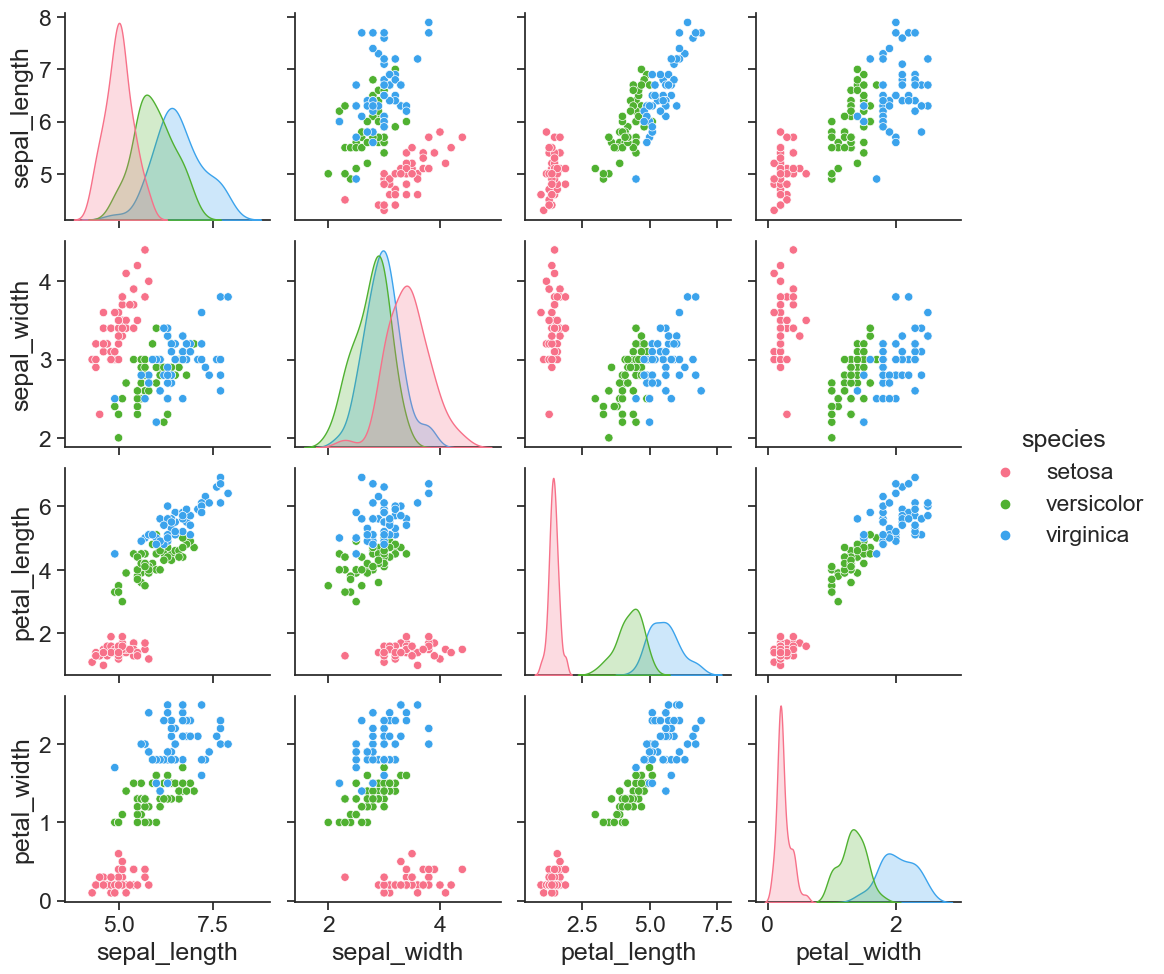

In [35]:
# En la diagonal plotea un gráfico KDE y de dispersión a los costados
df = sns.load_dataset('iris')
sns.set_style('ticks')
sns.pairplot(df,
             hue="species",
             diag_kind='kde',
             kind='scatter',
             palette='husl')
plt.show()

**Documentación:**
- [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- [PairPlot and PairGrid in Python](https://regenerativetoday.com/pairplot-and-pairgrid-in-python/)

**Fuente:** [An Ultimate Cheat Sheet for Stylish Data Visualization in Python's Seaborn Library](https://regenerativetoday.com/an-ultimate-cheat-sheet-for-stylish-data-visualization-in-pythons-seaborn-library/)